In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import math
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import os
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def open_data(file,
              info = False):
        """ Open the data and transform it in a DataFrame 
                Arguments :
                        file : CSV to read and convert into a pandas DataFrame
                        info = False : Boolean to get summary information on the created object
                Output :
                        A pandas DataFrame with all the data from the CSV file
        """
        df = pd.read_csv(file)
        if info is True :
                print('Five first rows of the generated DataFrame : \n {}'.format(df.head()))
                print('\nDataFrame shape : {}\n'.format(df.shape))
        return df

def create_train_test_set(dataframe,
                          train_frac,
                          test_frac):
        """ Create the train and test set for the training with a random method
                Arguments :
                        dataframe : pandas DataFrame containing the date to split
                        train_frac : float, fraction number of training data to keep
                        test_frac : float, fraction number of test data to keep
                Outputs : 
                        train_features : pandas DataFrame of the training points selected randomly
                        train_labels : pandas DataFrame, outputs for the training
                        test_features : pandas DataFrame of the test points selected randomly
                        test_labels : pandas DataFrame, outputs for the tests
         """
        train_dataset = dataframe.sample(frac = train_frac, random_state = 0)
        #train_dataset = dataframe
        tmp = dataframe.drop(train_dataset.index)
        test_dataset = tmp.sample(frac = test_frac, random_state = 0)
        tmp.drop(test_dataset.index)
        train_labels = train_dataset.pop('trip_duration')
        train_features = train_dataset
        test_labels = test_dataset.pop('trip_duration')
        test_features =test_dataset
        return train_features, train_labels, test_features, test_labels


In [3]:
import time
start_time = time.time()


# First, we open the file with the data and converts it to a DataFrame                          
data = open_data('preprocessed_train_data.csv')                                         
data.pop('Unnamed: 0')                                                                                                   
# We create the differente sets needed for the training                                                               
#train_data, train_labels, test_data, test_labels = create_train_test_set(df,0.05,0.2)             
                                                                                                                      
# To get better result, we standardize the features                                                                    
#normed_train_features, normed_test_features = norm(train_features), norm(test_features)
#normed_train_features.shape
time1 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.517465114593506 seconds ---


In [4]:
#data = data.drop(columns = ['dropoff_datetime','id','pickup_datetime','Unnamed: 0',
                            #'store_and_fwd_flag','date','speed'])


In [5]:
data['trip_duration'] = np.log(data['trip_duration'] + 1)

In [6]:
data.shape

(1450265, 37)

In [7]:
data['blizzard'] = data['blizzard'].astype(int)

In [8]:
np.sum(data.isna())

vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
trip_duration               0
direction                   0
distance_haversine          0
distance_dummy_manhattan    0
pickup_month                0
pickup_day                  0
pickup_hour                 0
pickup_weekday              0
jfk_dist_pick               0
jfk_dist_drop               0
lg_dist_pick                0
lg_dist_drop                0
jfk_trip                    0
lg_trip                     0
work                        0
rain                        0
s_fall                      0
all_precip                  0
has_snow                    0
has_rain                    0
s_depth                     0
minimum temperature         0
maximum temperature         0
total_distance              1
total_travel_time           1
number_of_steps             1
fastest_speed               1
left_turns

In [9]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,direction,distance_haversine,distance_dummy_manhattan,...,minimum temperature,maximum temperature,total_distance,total_travel_time,number_of_steps,fastest_speed,left_turns,right_turns,turns,blizzard
count,1.450265e+06,1.450265e+06,1.450265e+06,1.450265e+06,1.450265e+06,1.450265e+06,1.450265e+06,1.450265e+06,1.450265e+06,1.450265e+06,...,1.450265e+06,1.450265e+06,1.450264e+06,1.450264e+06,1.450264e+06,1.450264e+06,1.450264e+06,1.450264e+06,1.450264e+06,1.450265e+06
mean,1.533940e+00,1.664064e+00,-7.397360e+01,4.075098e+01,-7.397351e+01,4.075187e+01,6.468289e+00,-1.574240e+01,3.450800e+00,4.459704e+00,...,4.361214e+01,5.939775e+01,4.644837e+03,3.909597e+02,7.569429e+00,3.784830e+01,2.423389e+00,2.790440e+00,3.459985e+00,3.509014e-02
std,4.988469e-01,1.313422e+00,6.804396e-02,2.835866e-02,6.691204e-02,3.260510e-02,7.552601e-01,1.046627e+02,3.954448e+00,5.252881e+00,...,1.484144e+01,1.695748e+01,5.301816e+03,3.139307e+02,4.426738e+00,1.060652e+01,1.862332e+00,2.194179e+00,2.128147e+00,1.840077e-01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.738930e+01,-1.219333e+02,3.738910e+01,2.484907e+00,-1.799927e+02,0.000000e+00,0.000000e+00,...,-1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073740e+01,-7.399133e+01,4.073593e+01,5.988961e+00,-1.256522e+02,1.241203e+00,1.583094e+00,...,3.200000e+01,4.600000e+01,1.678100e+03,1.827000e+02,5.000000e+00,2.873606e+01,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398176e+01,4.075413e+01,-7.397977e+01,4.075455e+01,6.498282e+00,8.651929e+00,2.103218e+00,2.700783e+00,...,4.400000e+01,5.900000e+01,2.766700e+03,2.906000e+02,6.000000e+00,3.669956e+01,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396741e+01,4.076836e+01,-7.396309e+01,4.076982e+01,6.980076e+00,5.365074e+01,3.888326e+00,5.015655e+00,...,5.400000e+01,7.300000e+01,5.131025e+03,4.920000e+02,9.000000e+00,4.326039e+01,3.000000e+00,4.000000e+00,5.000000e+00,0.000000e+00
max,2.000000e+00,7.000000e+00,-7.242123e+01,4.169680e+01,-7.242123e+01,4.169335e+01,1.127911e+01,1.800000e+02,1.914028e+02,2.422908e+02,...,7.300000e+01,9.200000e+01,9.420420e+04,5.135400e+03,4.600000e+01,9.245394e+01,1.900000e+01,2.100000e+01,2.200000e+01,1.000000e+00


In [10]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

In [11]:
np.sum(data.isna())
data.shape

(1450264, 37)

In [20]:
train_data, train_labels, test_data, test_labels = create_train_test_set(data,0.2,0.1)  

In [21]:
print(np.sum(train_data.isna()))
print(train_data.shape)

vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
direction                   0
distance_haversine          0
distance_dummy_manhattan    0
pickup_month                0
pickup_day                  0
pickup_hour                 0
pickup_weekday              0
jfk_dist_pick               0
jfk_dist_drop               0
lg_dist_pick                0
lg_dist_drop                0
jfk_trip                    0
lg_trip                     0
work                        0
rain                        0
s_fall                      0
all_precip                  0
has_snow                    0
has_rain                    0
s_depth                     0
minimum temperature         0
maximum temperature         0
total_distance              0
total_travel_time           0
number_of_steps             0
fastest_speed               0
left_turns                  0
right_turn

In [170]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {
    'n_neighbors': 4
}
taxi_knn = KNeighborsRegressor(n_neighbors = 20)
taxi_knn.fit(train_data,train_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [171]:
knn_predictions = taxi_knn.predict(test_data)

In [172]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_error(knn_predictions, test_labels))
print(rmsle)

0.4201491850011508


In [80]:
rmsle_val = [] #to store rmse values for different k
for K in range(20,40):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(train_data, train_labels)  #fit the model
    pred=model.predict(test_data) #make prediction on test set
    error = np.sqrt(mean_squared_error(test_labels,pred)) #calculate rmse
    rmsle_val.append(error) #store rmse values
    print('RMLSE value for k= ' , K , 'is:', error)


RMLSE value for k=  21 is: 0.42950340401219445
RMLSE value for k=  22 is: 0.4292526345383238
RMLSE value for k=  23 is: 0.42912984630074563
RMLSE value for k=  24 is: 0.42884811556903774


KeyboardInterrupt: 

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

# Function to mesure the quality of a split
criterion = ['friedman_mse','mse']

# Strategy to choose to split
splitter = ['best','random']

# Maximum depth
max_depth = [int(x) for x in np.linspace(10, 300, num = 60)]
max_depth.append(None)

min_sample_split = [int(x) for x in np.linspace(1,50,num=50)]

min_sample_leaf = [int(x) for x in np.linspace(1,50,num=50)]

min_weight_fraction_leaf = [0.0,0.1,0.2]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

max_leaf_nodes = [10,20,30,40,50,None]

min_impurity_decrease = [0.0,0.1,0.2]

ccp_alpha = [0.0,0.1,0.2]

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_sample_leaf,
               'min_weight_fraction_leaf': min_weight_fraction_leaf,
               'max_features' : max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_impurity_decrease': min_impurity_decrease,
               'ccp_alpha': ccp_alpha}

print(random_grid)


{'criterion': ['friedman_mse', 'mse'], 'splitter': ['best', 'random'], 'max_depth': [10, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 68, 73, 78, 83, 88, 93, 98, 103, 108, 113, 118, 123, 127, 132, 137, 142, 147, 152, 157, 162, 167, 172, 177, 182, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [10, 20, 30, 40, 50, None], 'min_impurity_decrease': [0.0, 0.1, 0.2], 'ccp_alpha': [0.0, 0.1, 0

In [23]:
tree = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
tree_random = RandomizedSearchCV(estimator = tree, param_distributions = random_grid, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
tree_random.fit(train_data, train_labels)


Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [24]:
tree_random.best_estimator_


DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=152,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=40,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [25]:
base_model = DecisionTreeRegressor(random_state = 42)
base_model.fit(train_data, train_labels)
pes_predictions_base = base_model.predict(test_data)
base_accuracy = np.sqrt(mean_squared_error(test_labels,pes_predictions_base))

print("Root mean squared error: %.4f "
      % np.sqrt(mean_squared_error(test_labels,pes_predictions_base)))


best_random = tree_random.best_estimator_
pes_predictions_best = best_random.predict(test_data)
random_accuracy = np.sqrt(mean_squared_error(test_labels,pes_predictions_best))

print("Root mean squared error: %.4f MeV"
      % np.sqrt(mean_squared_error(test_labels,pes_predictions_best)))

print('Improvement of {:0.4f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Root mean squared error: 0.4786 
Root mean squared error: 0.3814 MeV
Improvement of 20.3114%.


0.3813513109581976


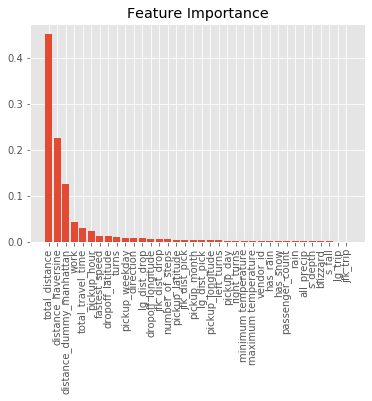

In [26]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = tree_random.best_estimator_
predictions = tree_reg.predict(test_data)
print(np.sqrt(mean_squared_error(test_labels,predictions)))

importances = tree_reg.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [list(train_data)[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_data.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_data.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor

train_data, train_labels, test_data, test_labels = create_train_test_set(data,1.,0.)  

tree_reg = RandomForestRegressor(n_jobs = -1, 
                                n_estimators = 56,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                max_features = 'auto',
                                max_depth = 50,
                                bootstrap = True,
                                verbose = 0)

tree_reg.fit(train_data,train_labels)

test = pd.read_csv('preprocessed_test_data.csv')
#test = test.replace([np.inf, -np.inf], np.nan)
test.pop('Unnamed: 0')                                                                                                   

np.sum(test.isna())

vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
direction                   0
distance_haversine          0
distance_dummy_manhattan    0
pickup_month                0
pickup_day                  0
pickup_hour                 0
pickup_weekday              0
jfk_dist_pick               0
jfk_dist_drop               0
lg_dist_pick                0
lg_dist_drop                0
jfk_trip                    0
lg_trip                     0
work                        0
rain                        0
s_fall                      0
all_precip                  0
has_snow                    0
has_rain                    0
s_depth                     0
minimum temperature         0
maximum temperature         0
total_distance              0
total_travel_time           0
number_of_steps             0
fastest_speed               0
left_turns                  0
right_turn

In [33]:
#tree_reg = tree_random.best_estimator_
test_predictions = tree_reg.predict(test)
test_predictions = np.exp(test_predictions) - 1
test_sample = pd.read_csv('nyc-taxi-trip-duration/test.csv')
df = pd.DataFrame(test_predictions, columns = ['trip_duration'])
my_submission = pd.DataFrame({'id' : test_sample['id'], 'trip_duration' : df['trip_duration']})
my_submission.to_csv('first_submission.csv',index=False)

0.5147325618751618


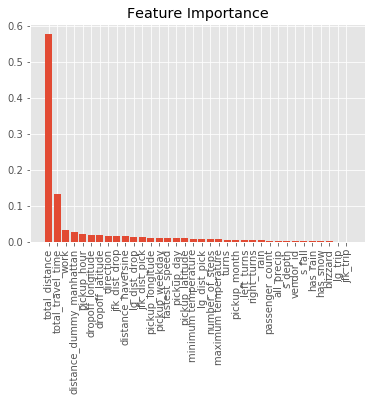

In [88]:
tree_reg = DecisionTreeRegressor().fit(train_data,train_labels)
predictions = tree_reg.predict(test_data)
print(np.sqrt(mean_squared_error(test_labels,predictions)))
importances = tree_reg.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [list(train_data)[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_data.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_data.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [35]:
knn_params = {
    'n_neighbors': 30
}
taxi_knn = KNeighborsRegressor(n_neighbors = 30)
taxi_knn.fit(train_data,train_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                    weights='uniform')

In [36]:
from sklearn.metrics import mean_squared_log_error
knn_predictions = taxi_knn.predict(test_data)
rmsle = np.sqrt(mean_squared_error(knn_predictions, test_labels))
print(rmsle)

0.4460664309963254


In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
C = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
epsilon = [.2,.3,.4,.5,.6]

random_grid = {'C': C,
               'epsilon': epsilon}

print(random_grid)

{'C': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'epsilon': [0.2, 0.3, 0.4, 0.5, 0.6]}


In [38]:
svr = SVR()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svr_random = RandomizedSearchCV(estimator = svr, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
svr_random.fit(train_data, train_labels)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
svr_random.best_estimator_

In [ ]:
base_model = SVR(C=900)
base_model.fit(train_data, train_labels)
pes_predictions_base = base_model.predict(test_data)
base_accuracy = np.sqrt(mean_squared_error(test_labels,pes_predictions_base))

print("Root mean squared error: %.2f "
      % np.sqrt(mean_squared_error(test_labels,pes_predictions_base)))


best_random = svr_random.best_estimator_
pes_predictions_best = best_random.predict(test_data)
random_accuracy = np.sqrt(mean_squared_error(test_labels,pes_predictions_best))

print("Root mean squared error: %.2f MeV"
      % np.sqrt(mean_squared_error(test_labels,pes_predictions_best)))

print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

In [22]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import KFold
from sklearn.exceptions import NotFittedError

class StackedRegressor(BaseEstimator, RegressorMixin):
    
    def __init__(self, base_learners, meta_learner=BayesianRidge(),
                 n_splits=3, shuffle=True, preprocessing=None, n_jobs=-1):
        """Uses a meta-estimator to predict from base estimators predictions
        Parameters
        ----------
        base_learners : list of sklearn Estimators
            List of base estimators to use.     
        meta_learner : sklearn Estimator
            Meta estimator to use.
        n_splits : int
            Number of cross-validation splits
        shuffle : bool
            Whether to shuffle the data
        preprocessing : sklearn Estimator
            Preprocessing pipline to apply to the data before using models
            to predict.  This saves time for heavy preprocessing workloads
            because the preprocessing does not have to be repeated for each
            estimator.
        n_jobs : int
            Number of parallel jobs to run. Default is to use as many 
            threads as there are processors.
        """
        
        # Check inputs
        if not isinstance(base_learners, list):
            raise TypeError('base_learners must be a list of estimators')
        if not isinstance(meta_learner, BaseEstimator):
            raise TypeError('meta_learner must be an sklearn estimator')
        if not isinstance(n_splits, int):
            raise TypeError('n_splits must be an int')
        if n_splits < 1:
            raise ValueError('n_splits must be positive')
        if not isinstance(shuffle, bool):
            raise TypeError('shuffle must be True or False')
        if (preprocessing is not None and
                not (hasattr(preprocessing, 'fit') and 
                     hasattr(preprocessing, 'transform'))):
            raise TypeError('preprocessing must be an sklearn transformer')
        if not isinstance(n_jobs, int):
            raise TypeError('n_jobs must be an int')
        if n_jobs is not None and (n_jobs < -1 or n_jobs == 0):
            raise ValueError('n_jobs must be None or >0 or -1')

        # Store learners as dict
        self.base_learners = dict()
        for i, learner in enumerate(base_learners):
            if (isinstance(learner, tuple) and
                    len(learner)==2 and 
                    isinstance(learner[0], str) and 
                    isinstance(learner[1], BaseEstimator)):
                self.base_learners[learner[0]] = learner[1]
            elif hasattr(learner, 'fit') and hasattr(learner, 'predict'):
                self.base_learners[str(i)] = learner
            else:
                raise TypeError('each element of base_learners must be an '
                                'sklearn estimator or a (str, sklearn '
                                'estimator) tuple')

        # Store parameters
        self.meta_learner = meta_learner
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.preprocessing = preprocessing
        self.n_jobs = n_jobs
        
        
    def fit(self, X, y):
        """Fit the ensemble of base learners and the meta-estimator
        Parameters
        ----------
        X : pandas DataFrame
            Features
        y : pandas Series
            Target variable
        Returns
        -------
        self
            The fit estimator
        """

        # Preprocess the data
        if self.preprocessing is None:
            Xp = X
        else:
            self.preprocessing = self.preprocessing.fit(X, y)
            Xp = self.preprocessing.transform(X)
        
        # Use base learners to cross-val predict
        preds = pd.DataFrame(index=X.index)
        kf = KFold(n_splits=self.n_splits, shuffle=self.shuffle)
        for name, learner in self.base_learners.items():
            preds[name] = cross_val_predict(learner, Xp, y, 
                                            cv=kf, n_jobs=self.n_jobs)
            
        # Fit base learners to all samples
        for _, learner in self.base_learners.items():
            learner = learner.fit(Xp, y)
            
        # Fit meta learner on base learners' predictions
        self.meta_learner = self.meta_learner.fit(preds, y)

        # Return fit object
        return self
    
                
    def predict(self, X, y=None):
        """Predict using the meta-estimator
        Parameters
        ----------
        X : pandas DataFrame
            Features
        Returns
        -------
        y_pred : pandas Series
            Predicted target variable
        """

        # Preprocess the data
        if self.preprocessing is None:
            Xp = X
        else:
            Xp = self.preprocessing.transform(X)
        
        # Use base learners to predict
        preds = pd.DataFrame(index=X.index)
        for name, learner in self.base_learners.items():
            preds[name] = learner.predict(Xp)
            
        # Use meta learner to predict based on base learners' predictions
        y_pred = self.meta_learner.predict(preds)
        
        # Return meta-learner's predictions
        return y_pred


    def fit_predict(self, X, y):
        """Fit the ensemble and then predict on features in X
        Parameters
        ----------
        X : pandas DataFrame
            Features
        y : pandas Series
            Target variable
            
        Returns
        -------
        y_pred : pandas Series
            Predicted target variable
        """
        return self.fit(X, y).predict(X)

def root_mean_squared_error(y_true, y_pred):
    """Root mean squared error regression loss"""
    return np.sqrt(np.mean(np.square(y_true-y_pred)))

    
def cross_val_metric(model, X, y, cv=3, 
                     metric=root_mean_squared_error, 
                     train_subset=None, test_subset=None, 
                     shuffle=False, display=None):
    """Compute a cross-validated metric for a model.
    
    Parameters
    ----------
    model : sklearn estimator or callable
        Model to use for prediction.  Either an sklearn estimator 
        (e.g. a Pipeline), or a function which takes 3 arguments: 
        (X_train, y_train, X_test), and returns y_pred.
        X_train and X_test should be pandas DataFrames, and
        y_train and y_pred should be pandas Series.
    X : pandas DataFrame
        Features.
    y : pandas Series
        Target variable.
    cv : int
        Number of cross-validation folds
    metric : sklearn.metrics.Metric
        Metric to evaluate.
    train_subset : pandas Series (boolean)
        Subset of the data to train on. 
        Must be same size as y, with same index as X and y.
    test_subset : pandas Series (boolean)
        Subset of the data to test on.  
        Must be same size as y, with same index as X and y.
    shuffle : bool
        Whether to shuffle the data. Default = False
    display : None or str
        Whether to print the cross-validated metric.
        If None, doesn't print.
    
    Returns
    -------
    metrics : list
        List of metrics for each test fold (length cv)
    preds : pandas Series
        Cross-validated predictions
    """
    
    # Use all samples if not specified
    if train_subset is None:
        train_subset = y.copy()
        train_subset[:] = True
    if test_subset is None:
        test_subset = y.copy()
        test_subset[:] = True
    
    # Perform the cross-fold evaluation
    metrics = []
    TRix = y.copy()
    TEix = y.copy()
    all_preds = y.copy()
    kf = KFold(n_splits=cv, shuffle=shuffle)
    for train_ix, test_ix in kf.split(X):
        
        # Indexes for samples in training fold and train_subset
        TRix[:] = False
        TRix.iloc[train_ix] = True
        TRix = TRix & train_subset
        
        # Indexes for samples in test fold and in test_subset
        TEix[:] = False
        TEix.iloc[test_ix] = True
        TEix = TEix & test_subset
        
        # Predict using a function
        if callable(model):
            preds = model(X.loc[TRix,:], y[TRix], X.loc[TEix,:])
        else:
            model.fit(X.loc[TRix,:], y[TRix])
            preds = model.predict(X.loc[TEix,:])
        
        # Store metric for this fold
        metrics.append(metric(y[TEix], preds))

        # Store predictions for this fold
        all_preds[TEix] = preds

    # Print the metric
    metrics = np.array(metrics)
    if display is not None:
        print('Cross-validated %s: %0.3f +/- %0.3f'
              % (display, metrics.mean(), metrics.std()))
        
    # Return a list of metrics for each fold
    return metrics, all_preds


In [23]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# First, we open the file with the data and converts it to a DataFrame                          
#df = open_data('clean_data.csv')                                         
#df.pop('Unnamed: 0')                                                                                                   
# We create the differente sets needed for the training                                                               
train_data, train_labels, test_data, test_labels = create_train_test_set(data,0.8,0.2)             
                                                                                                                      
# To get better result, we standardize the features                                                                    
#normed_train_features, normed_test_features = norm(train_features), norm(test_features)

# Create the ensemble regressor
model = StackedRegressor([DecisionTreeRegressor(criterion='friedman_mse', 
                                                max_depth=41,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_samples_leaf=20, 
                                                min_samples_split=10,
                                                splitter='random'),
                         DecisionTreeRegressor(criterion='mse', 
                                                max_depth=30,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_samples_leaf=20, 
                                                min_samples_split=10,
                                                splitter='random'),
                         DecisionTreeRegressor(criterion='friedman_mse', 
                                                max_depth=60,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_samples_leaf=20, 
                                                min_samples_split=10,
                                                splitter='random'),
                         RandomForestRegressor(n_jobs = -1, 
                                n_estimators = 56,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                max_features = 'auto',
                                max_depth = 50,
                                bootstrap = True,
                                verbose = 0)],
                         meta_learner=BayesianRidge())

# Performance of ensemble
cross_val_metric(model, train_data, train_labels,metric=root_mean_squared_error,cv=3, display='RMSE')

KeyboardInterrupt: 

In [92]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 100, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

RandomForestRegressor(n_jobs = -1, 
                                n_estimators = 56,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                max_features = 'auto',
                                max_depth = 50,
                                bootstrap = True,
                                verbose = 0),
                          RandomForestRegressor(n_jobs = -1, 
                                n_estimators = 100,
                                min_samples_split = 5,
                                min_samples_leaf = 1,
                                max_features = 'auto',
                                max_depth = 30,
                                bootstrap = True,
                                verbose = 0),

{'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [93]:
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(train_data, train_labels)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [94]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=92, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [95]:
base_model = RandomForestRegressor(n_jobs = -1, 
                                n_estimators = 56,
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                max_features = 'auto',
                                max_depth = 50,
                                bootstrap = True,
                                verbose = 0)
base_model.fit(train_data, train_labels)
pes_predictions_base = base_model.predict(test_data)
base_accuracy = np.sqrt(mean_squared_error(test_labels,pes_predictions_base))

print("Root mean squared error: %.5f "
      % np.sqrt(mean_squared_error(test_labels,pes_predictions_base)))


best_random = rf_random.best_estimator_
pes_predictions_best = best_random.predict(test_data)
random_accuracy = np.sqrt(mean_squared_error(test_labels,pes_predictions_best))

print("Root mean squared error: %.5f MeV"
      % np.sqrt(mean_squared_error(test_labels,pes_predictions_best)))

print('Improvement of {:0.5f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Root mean squared error: 0.36360 
Root mean squared error: 0.36156 MeV
Improvement of 0.56105%.


In [18]:
test = pd.read_csv('preprocessed_test_data.csv')
#test = test.replace([np.inf, -np.inf], np.nan)
test.pop('Unnamed: 0')                                                                                                   

np.sum(test.isna())

vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
direction                   0
distance_haversine          0
distance_dummy_manhattan    0
pickup_month                0
pickup_day                  0
pickup_hour                 0
pickup_weekday              0
jfk_dist_pick               0
jfk_dist_drop               0
lg_dist_pick                0
lg_dist_drop                0
jfk_trip                    0
lg_trip                     0
work                        0
rain                        0
s_fall                      0
all_precip                  0
has_snow                    0
has_rain                    0
s_depth                     0
minimum temperature         0
maximum temperature         0
total_distance              0
total_travel_time           0
number_of_steps             0
fastest_speed               0
left_turns                  0
right_turn

In [19]:
#test = test.replace([np.inf, -np.inf], np.nan).dropna()
test_predictions = model.predict(test)

In [20]:
test_predictions = model.predict(test)
test_predictions = np.exp(test_predictions) - 1
test_sample = pd.read_csv('nyc-taxi-trip-duration/test.csv')
df = pd.DataFrame(test_predictions, columns = ['trip_duration'])
my_submission = pd.DataFrame({'id' : test_sample['id'], 'trip_duration' : df['trip_duration']})
my_submission.to_csv('first_submission.csv',index=False)

In [21]:
test_sample = pd.read_csv('nyc-taxi-trip-duration/test.csv')

In [163]:

df = pd.DataFrame(test_predictions, columns = ['trip_duration'])
my_submission = pd.DataFrame({'id' : test_sample['id'], 'trip_duration' : df['trip_duration']})

In [164]:
my_submission.head()

,id,trip_duration
0,id3004672,782.512042
1,id3505355,505.604915
2,id1217141,421.079911
3,id2150126,955.475418
4,id1598245,349.926546


In [165]:
my_submission.to_csv('first_submission.csv',index=False)

In [166]:
pd.read_csv('nyc-taxi-trip-duration/sample_submission.csv').head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [24]:
start_time = time.time()
from sklearn.model_selection import KFold
import xgboost as xgb

ntrain = train_data.shape[0]
ntest = test_data.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold( n_splits = NFOLDS)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        if clf != SVR and clf != KNeighborsRegressor:
            params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
time2 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.3283538818359375 seconds ---


In [25]:
start_time = time.time()
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)
time3 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00025391578674316406 seconds ---


In [36]:
start_time = time.time()
# Put in our parameters for said classifiers
# Random Forest parameters

rf_params = {
    'n_jobs': -1, 
    'n_estimators': 56,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'auto',
    'max_depth': 50,
    'bootstrap': True,
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.7
}

  
# Gradient Boosting parameters
gb_params = {
    
}
rf_1_params = {
    'bootstrap' : True,
    'max_depth' : 40,
    'max_features' : 'auto',
    'min_samples_leaf' : 1,
    'min_samples_split' : 2,
    'n_estimators' : 102,
    'n_jobs' : -1
    
} 

rf_2_params = {
    'bootstrap' : True,
    'max_depth' : 50,
    'max_features' : 'auto',
    'min_samples_leaf' : 1,
    'min_samples_split' : 2,
    'n_estimators' : 56,
    'n_jobs' : -1
    
}


    
tree_1_params = {
    'criterion':'friedman_mse', 
    'max_depth':41,
    'max_features':'auto',
    'max_leaf_nodes':None,
    'min_samples_leaf':20, 
    'min_samples_split':10,
    'splitter':'random'
}



# Support Vector Classifier parameters 
svc_params = {
    'epsilon': 0.7,
    'C': 1000
    }

knn_params = {
    'n_neighbors': 4
}
time4 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0003578662872314453 seconds ---


In [38]:
start_time = time.time()
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
rf1 = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_1_params)
rf2 = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_2_params)
tree = SklearnHelper(clf=DecisionTreeRegressor, seed=SEED,params=tree_1_params)
#et = SklearnHelper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
#ada = SklearnHelper(clf=AdaBoostRegressor, seed=SEED, params=ada_params)
#gb = SklearnHelper(clf=GradientBoostingRegressor, seed=SEED, params=gb_params)
#svc = SklearnHelper(clf=SVR, seed=SEED, params=svc_params)
#knn = SklearnHelper(clf=KNeighborsRegressor, seed=SEED, params=knn_params)
time5 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0005230903625488281 seconds ---


In [39]:
start_time = time.time()
train_data, train_labels, test_data, test_labels = create_train_test_set(data,0.9,0.1)             
normed_train_features = train_data.to_numpy()
normed_test_features = test_data.to_numpy()
train_labels = train_labels.to_numpy()
test_labels = test_labels.to_numpy()
time6 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.150620937347412 seconds ---


In [40]:
start_time = time.time()
# Create our OOF train and test predictions. These base results will be used as new features
#et_oof_train, et_oof_test = get_oof(et, normed_train_features, train_labels, normed_test_features) # Extra Trees
#print('OK')
rf_oof_train, rf_oof_test = get_oof(rf,normed_train_features, train_labels, normed_test_features) # Random Forest
print('OK')
rf1_oof_train, rf1_oof_test = get_oof(rf1,normed_train_features, train_labels, normed_test_features) # Random Forest
print('OK')
rf2_oof_train, rf2_oof_test = get_oof(rf2,normed_train_features, train_labels, normed_test_features) # Random Forest
print('OK')
tree_oof_train, tree_oof_test = get_oof(tree,normed_train_features, train_labels, normed_test_features) # Random Forest
print('OK')
#ada_oof_train, ada_oof_test = get_oof(ada, normed_train_features, train_labels, normed_test_features) # AdaBoost 
#print('OK')
#gb_oof_train, gb_oof_test = get_oof(gb,normed_train_features, train_labels, normed_test_features) # Gradient Boost
#print('OK')
#svc_oof_train, svc_oof_test = get_oof(svc,normed_train_features, train_labels, normed_test_features) # Support Vector Classifier
#print('OK')
#knn_oof_train, knn_oof_test = get_oof(knn,normed_train_features,train_labels,normed_test_features)  # kNN
print("Training is complete")
time7 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

ValueError: could not broadcast input array from shape (14503) into shape (58011)

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')


In [ ]:
start_time = time.time()
x_train = np.concatenate((rf_oof_train, rf1_oof_train,rf2_oof_train,tree_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test,rf1_oof_test,rf2_oof_test,tree_oof_test), axis=1)
time8 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
test = pd.read_csv('preprocessed_test_data.csv')
#test = test.replace([np.inf, -np.inf], np.nan)
test.pop('Unnamed: 0')                                                                                                   

"""start_time = time.time()
gbm = xgb.XGBRegressor(
     learning_rate = 0.01,
     n_estimators= 1000,
     max_depth= 110,
     min_child_weight= 5,
     gamma=.5,                        
     subsample=1.,
     colsample_bytree=1.,
     nthread= -1,
     scale_pos_weight=1).fit(x_train, train_labels)

predictions = gbm.predict(x_test)
time9 = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))"""
br = BayesianRidge().fit(x_train,train_labels)
test_predictions = br.predict(test)

In [ ]:
#test_predictions = model.predict(test)
test_predictions = np.exp(test_predictions) - 1
test_sample = pd.read_csv('nyc-taxi-trip-duration/test.csv')
df = pd.DataFrame(test_predictions, columns = ['trip_duration'])
my_submission = pd.DataFrame({'id' : test_sample['id'], 'trip_duration' : df['trip_duration']})
my_submission.to_csv('first_submission.csv',index=False)

In [110]:
rmsle = np.sqrt(mean_squared_error(predictions,test_labels))
print(rmsle)


0.3658530219996629


In [113]:
train_data.shape[0]


14503

In [29]:
def stacking(train_x, train_y, test_x):
    m = int(train_x.shape[0]/4)
    train_data_split_1 = train_x.iloc[:m,:]
    train_data_split_2 = train_x.iloc[m+m:m+m+m,:]
    train_data_split_3 = train_x.iloc[m:m+m,:]
    train_data_split_4 = train_x.iloc[m+m+m : , :]
    train_labels_split_1, train_labels_split_2 = train_y.iloc[:m], train_y.iloc[m+m:m+m+m]
    train_labels_split_3, train_labels_split_4 =  train_y.iloc[m:m+m], train_y.iloc[m+m+m :]
    
    rf_1 = RandomForestRegressor(bootstrap = True,
                           max_depth = 40,
                           max_features = 'auto',
                           min_samples_leaf = 1,
                           min_samples_split = 2,
                           n_estimators = 102)
    
    tree_1 = DecisionTreeRegressor(criterion='friedman_mse', 
                                 max_depth=41,
                                 max_features='auto',
                                 max_leaf_nodes=None,
                                 min_samples_leaf=20, 
                                 min_samples_split=10,
                                 splitter='random')

    
    rf_2 = RandomForestRegressor(n_jobs = -1, 
                                 n_estimators = 56,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 max_depth = 50,
                                 bootstrap = True,
                                 verbose = 0)
    """rf_3 = RandomForestRegressor(n_jobs = -1, 
                                 n_estimators = 100,
                                 min_samples_split = 5,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 max_depth = 30,
                                 bootstrap = True,
                                 verbose = 0)"""
    
    #svr_1 = SVR(C=200,epsilon=0.8)
    #svr_2 = SVR(C=400,epsilon=0.9)
    #knn_1 = KNeighborsRegressor(n_neighbors=20)
    knn_2 = BayesianRidge()
                          
    tree_2 = DecisionTreeRegressor(criterion='mse', 
                                   max_depth=30,
                                   max_features='auto',
                                   max_leaf_nodes=None,
                                   min_samples_leaf=20, 
                                   min_samples_split=10,
                                   splitter='random')
    
    ### layer 1
    
    rf_1.fit(train_data_split_1,train_labels_split_1)
    rf_2.fit(train_data_split_1,train_labels_split_1)
    #rf_3.fit(train_data_split_1,train_labels_split_1)
    tree_1.fit(train_data_split_1,train_labels_split_1)
    tree_2.fit(train_data_split_1,train_labels_split_1)
    #svr_1.fit(train_data_split_1,train_labels_split_1)
    #svr_2.fit(train_data_split_1,train_labels_split_1)
    #knn_1.fit(train_data_split_1,train_labels_split_1)
    knn_2.fit(train_data_split_1,train_labels_split_1)

    print('learned first layer')
    
    prediction_rf_1 = rf_1.predict(train_data_split_2)
    prediction_rf_2 = rf_2.predict(train_data_split_2)
    #prediction_rf_3 = rf_3.predict(train_data_split_2)
    prediction_tree_1 = tree_1.predict(train_data_split_2)
    prediction_tree_2 = tree_2.predict(train_data_split_2)
    #prediction_svr_1 = svr_1.predict(train_data_split_2)
    #prediction_svr_2 = svr_2.predict(train_data_split_2)
    #prediction_knn_1 = knn_1.predict(train_data_split_2)
    prediction_knn_2 = knn_2.predict(train_data_split_2)
    
    input_stack = pd.DataFrame(list(zip(prediction_rf_1,prediction_rf_2,
                                        prediction_tree_1,prediction_tree_2,prediction_knn_2)), 
                               columns =['rf_1', 'rf_2','tree_1','tree_2','knn_2']) 
    
    rf_stack = RandomForestRegressor(bootstrap = True,
                           max_depth = 40,
                           max_features = 'auto',
                           min_samples_leaf = 1,
                           min_samples_split = 2,
                           n_estimators = 102)
    
    tree_stack = DecisionTreeRegressor(criterion='friedman_mse', 
                                 max_depth=41,
                                 max_features='auto',
                                 max_leaf_nodes=None,
                                 min_samples_leaf=20, 
                                 min_samples_split=10,
                                 splitter='random')
    
    knn_stack = BayesianRidge()
    
    print('predict on first layer')
    
    ### layer 2 training
    
    rf_stack.fit(input_stack,train_labels_split_2)
    tree_stack.fit(input_stack,train_labels_split_2)
    knn_stack.fit(input_stack,train_labels_split_2)
    
    print('learned second layer')
    ### layer 2
    
    prediction_rf_1_1 = rf_1.predict(train_data_split_3)
    prediction_rf_2_1 = rf_2.predict(train_data_split_3)
    #prediction_rf_3_1 = rf_3.predict(train_data_split_3)
    prediction_tree_1_1 = tree_1.predict(train_data_split_3)
    prediction_tree_2_1 = tree_2.predict(train_data_split_3)
    #prediction_svr_1_1 = svr_1.predict(train_data_split_3)
    #prediction_svr_2_1 = svr_2.predict(train_data_split_3)
    #prediction_knn_1_1 = knn_1.predict(train_data_split_3)
    prediction_knn_2_1 = knn_2.predict(train_data_split_3)
    
    input_stack = pd.DataFrame(list(zip(prediction_rf_1_1,prediction_rf_2_1,
                                        prediction_tree_1_1,prediction_tree_2_1,prediction_knn_2_1)), 
                               columns =['rf_1', 'rf_2','tree_1','tree_2','knn_2']) 
    
    
    prediction_rf_stack = rf_stack.predict(input_stack)
    prediction_tree_stack = tree_stack.predict(input_stack)
    prediction_knn_stack = knn_stack.predict(input_stack)
    
    input_stack_2 = pd.DataFrame(list(zip(prediction_rf_stack,prediction_tree_stack,prediction_knn_stack)),
                                 columns = ['rf_stack','tree_stack','knn_stack'])
    
    ### layer 3 training
    
    rf_stack_2 = RandomForestRegressor(bootstrap = True,
                           max_depth = 40,
                           max_features = 'auto',
                           min_samples_leaf = 1,
                           min_samples_split = 2,
                           n_estimators = 102)
    
    tree_stack_2 = DecisionTreeRegressor(criterion='friedman_mse', 
                                 max_depth=41,
                                 max_features='auto',
                                 max_leaf_nodes=None,
                                 min_samples_leaf=20, 
                                 min_samples_split=10,
                                 splitter='random')
    
    knn_stack_2 = BayesianRidge()
    
    
    print('predict second layer')
    
    rf_stack_2.fit(input_stack_2,train_labels_split_3)
    tree_stack_2.fit(input_stack_2,train_labels_split_3)
    knn_stack_2.fit(input_stack_2,train_labels_split_3)
    
    ### layer 3
    
    print('learned third layer')

    prediction_rf_1_1 = rf_1.predict(train_data_split_4)
    prediction_rf_2_1 = rf_2.predict(train_data_split_4)
    #prediction_rf_3_1 = rf_3.predict(train_data_split_4)
    prediction_tree_1_1 = tree_1.predict(train_data_split_4)
    prediction_tree_2_1 = tree_2.predict(train_data_split_4)
    #prediction_svr_1_1 = svr_1.predict(train_data_split_4)
    #prediction_svr_2_1 = svr_2.predict(train_data_split_4)
    #prediction_knn_1_1 = knn_1.predict(train_data_split_4)
    prediction_knn_2_1 = knn_2.predict(train_data_split_4)
    
    input_stack = pd.DataFrame(list(zip(prediction_rf_1_1,prediction_rf_2_1,
                                        prediction_tree_1_1,prediction_tree_2_1,prediction_knn_2_1)), 
                               columns =['rf_1', 'rf_2','tree_1','tree_2','knn_2']) 
    
    
    prediction_rf_stack = rf_stack.predict(input_stack)
    prediction_tree_stack = tree_stack.predict(input_stack)
    prediction_knn_stack = knn_stack.predict(input_stack)
    
    input_stack_2 = pd.DataFrame(list(zip(prediction_rf_stack,prediction_tree_stack,prediction_knn_stack)),
                                 columns = ['rf_stack','tree_stack','knn_stack'])
    
    
    prediction_rf_stack_2 = rf_stack_2.predict(input_stack_2)
    prediction_tree_stack_2 = tree_stack_2.predict(input_stack_2)
    prediction_knn_stack_2 = knn_stack_2.predict(input_stack_2)
    
    print('predict third layer')
    
    ### layer 4
    
    input_blending = pd.DataFrame(list(zip(prediction_rf_stack_2,prediction_tree_stack_2,prediction_knn_stack_2)),
                                 columns = ['rf_stack','tree_stack','knn_stack'])
    
    
    br_blending = BayesianRidge()
    br_blending.fit(input_blending,train_labels_split_4)
    
    print('learned blender')

    ### test 
    
    test_rf_1 = rf_1.predict(test_x)
    test_rf_2 = rf_2.predict(test_x)
    #test_rf_3 = rf_3.predict(test_x)
    test_tree_1 = tree_1.predict(test_x)
    test_tree_2 = tree_2.predict(test_x)
    #test_svr_1 = svr_1.predict(test_x)
    #test_svr_2 = svr_2.predict(test_x)
    #test_knn_1 = knn_1.predict(test_x)
    test_knn_2 = knn_2.predict(test_x)
    
  
    test_stack = pd.DataFrame(list(zip(test_rf_1,test_rf_2,
                                        test_tree_1,test_tree_2,test_knn_2)), 
                               columns =['rf_1', 'rf_2','tree_1','tree_2','knn_2'])
    
    
    test_rf_stack = rf_stack.predict(test_stack)
    test_tree_stack = tree_stack.predict(test_stack)
    test_knn_stack = knn_stack.predict(test_stack)
    
    
    test_stack_2= pd.DataFrame(list(zip(test_rf_stack,test_tree_stack,test_knn_stack)),
                                 columns = ['rf_stack','tree_stack','knn_stack'])
    
    test_rf_stack_2 = rf_stack_2.predict(test_stack_2)
    test_tree_stack_2 = tree_stack_2.predict(test_stack_2)
    test_knn_stack_2 = knn_stack_2.predict(test_stack_2)
    
    
    test_blending= pd.DataFrame(list(zip(test_rf_stack_2,test_tree_stack_2,test_knn_stack_2)),
                                 columns = ['rf_stack','tree_stack','knn_stack'])
    
    predictions_test = br_blending.predict(test_blending)
    
    return(predictions_test)


In [30]:
test = pd.read_csv('preprocessed_test_data.csv')
#test = test.replace([np.inf, -np.inf], np.nan)
test.pop('Unnamed: 0')                                                                                                   

np.sum(test.isna())

vendor_id                   0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
direction                   0
distance_haversine          0
distance_dummy_manhattan    0
pickup_month                0
pickup_day                  0
pickup_hour                 0
pickup_weekday              0
jfk_dist_pick               0
jfk_dist_drop               0
lg_dist_pick                0
lg_dist_drop                0
jfk_trip                    0
lg_trip                     0
work                        0
rain                        0
s_fall                      0
all_precip                  0
has_snow                    0
has_rain                    0
s_depth                     0
minimum temperature         0
maximum temperature         0
total_distance              0
total_travel_time           0
number_of_steps             0
fastest_speed               0
left_turns                  0
right_turn

In [33]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge


train_data, train_labels, test_data, test_labels = create_train_test_set(data,0.9,0.1)  
test_predictions = stacking(train_data, train_labels, test)

learned first layer
predict on first layer
learned second layer
predict second layer
learned third layer
predict third layer
learned blender


In [35]:
#test_predictions = model.predict(test)
test_predictions = np.exp(test_predictions) - 1
test_sample = pd.read_csv('nyc-taxi-trip-duration/test.csv')
df = pd.DataFrame(test_predictions, columns = ['trip_duration'])
my_submission = pd.DataFrame({'id' : test_sample['id'], 'trip_duration' : df['trip_duration']})
my_submission.to_csv('first_submission.csv',index=False)